In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
data = pd.read_csv(r'C:\Users\Anuj\Downloads\Project happiness\Project happiness\2019.csv')
data


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [27]:
data.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

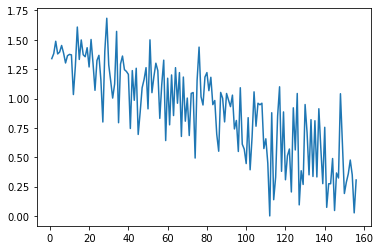

In [28]:
x=data['Overall rank']
y=data['GDP per capita']
plt.plot(x,y)

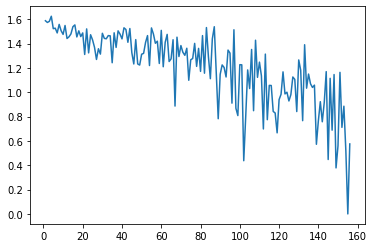

In [29]:
x=data['Overall rank']
y=data['Social support']
plt.plot(x,y)

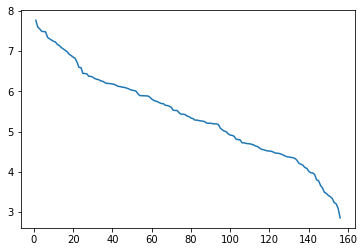

In [30]:
x=data['Overall rank']
y=data['Score']
plt.plot(x,y)

In [31]:
x=data['Country or region']== 'India' 
t=data[x]
t

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
139,140,India,4.015,0.755,0.765,0.588,0.498,0.2,0.085


In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


train = np.asarray(data.drop(['Country or region','Overall rank'],axis=1))
test=np.asarray(data['Score'])
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [139]:
model_pipeline_rfgr = Pipeline([('scaler1', StandardScaler()), 
                                 ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
                                 ])

In [140]:
model_pipeline_lgr = Pipeline([('scaler2', StandardScaler()), 
                                 ('linearrgr', LinearRegression())
                                 ])

In [142]:
model_pipeline_drgr = Pipeline([('scaler3', StandardScaler()), 
                                 ('distreergr', DecisionTreeRegressor(random_state=2))
                                 ])

In [143]:
pipelines=[model_pipeline_rfgr,model_pipeline_lgr,model_pipeline_drgr]

In [144]:
bestaccu=0.0
bestrgr=0
bestpipeline=""

In [145]:
pipe_dict={0:"Random Forest regression",1:"Linear Regression",2:"Decesion Tree Regressor "}

In [146]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [147]:
for i,model in enumerate(pipelines):
    print("{} Test acuuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))

Random Forest regression Test acuuracy:0.998036117272868
Linear Regression Test acuuracy:1.0
Decesion Tree Regressor  Test acuuracy:0.9882944067220922


In [148]:
model_pipeline_rfgr.predict(X_test)

array([5.01876, 5.5369 , 5.27949, 5.44378, 4.54504, 6.40122, 5.11416,
       4.35285, 5.20904, 3.97426, 6.81918, 5.21174, 7.07475, 4.44315,
       6.40827, 6.31578, 4.50406, 4.87873, 3.33329, 5.38032, 4.90869,
       6.88166, 6.97802, 7.22654, 6.28588, 4.79989, 5.6811 , 5.87713,
       6.05195, 4.99208, 6.08533, 3.40831, 5.87949, 4.03971, 4.4821 ,
       4.3591 , 4.3842 , 5.69471, 6.1049 , 6.38804, 4.11681, 5.33642,
       4.35716, 6.19317, 5.45129, 6.58599, 4.12255, 5.27528, 7.11687,
       5.74787, 5.71336, 4.47409])

In [149]:
model_pipeline_drgr.predict(X_test)

array([4.906, 5.529, 5.274, 5.525, 4.559, 6.592, 4.906, 4.286, 5.191,
       3.975, 6.923, 5.192, 7.09 , 4.286, 6.293, 6.293, 4.548, 5.044,
       3.203, 5.323, 5.044, 6.923, 7.054, 7.343, 6.293, 4.799, 5.743,
       5.86 , 6.028, 5.044, 6.105, 3.334, 5.809, 3.975, 4.49 , 4.366,
       4.286, 5.743, 6.118, 6.375, 3.802, 5.386, 4.286, 6.198, 5.467,
       6.375, 4.107, 5.274, 7.343, 5.743, 5.743, 4.466])

In [150]:
model_pipeline_lgr.predict(X_test)

array([5.011, 5.603, 5.285, 5.425, 4.587, 6.354, 5.082, 4.332, 5.175,
       4.015, 6.852, 5.197, 7.021, 4.437, 6.446, 6.321, 4.516, 4.883,
       3.231, 5.373, 4.944, 6.892, 7.139, 7.246, 6.3  , 4.796, 5.631,
       5.89 , 6.008, 4.996, 6.1  , 3.488, 5.888, 4.085, 4.461, 4.374,
       4.39 , 5.653, 6.125, 6.436, 4.212, 5.339, 4.35 , 6.199, 5.43 ,
       6.595, 4.189, 5.247, 7.167, 5.779, 5.648, 4.456])

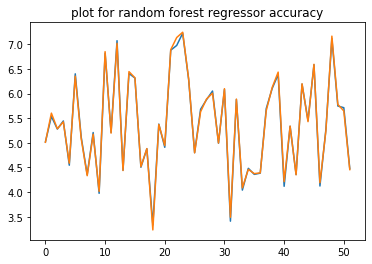

In [152]:
x=model_pipeline_drgr.predict(X_test)
y=y_test
plt.title("plot for Random Forest regression accuracy")
plt.plot(x)
plt.plot(y)
plt.show()

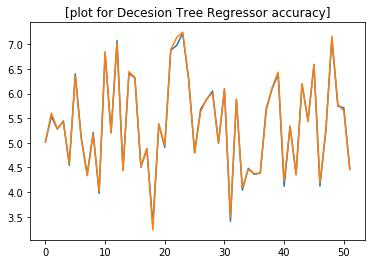

In [153]:
x=model_pipeline_rfgr.predict(X_test)
y=y_test
plt.title("[plot for Decesion Tree Regressor accuracy]")
plt.plot(x)
plt.plot(y)
plt.show()

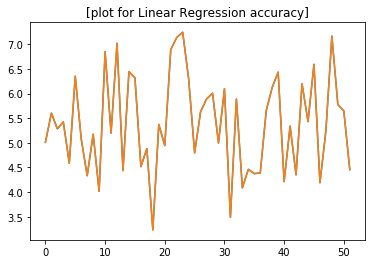

In [154]:
x=model_pipeline_lgr.predict(X_test)
y=y_test
plt.title("[plot for Linear Regression accuracy]")
plt.plot(x)
plt.plot(y)
plt.show()

In [ ]:
|